In [4]:
import numpy as np 
import pandas as pd 
import os

In [5]:
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))

./.config/configurations/config_default
./.config/logs/2022.06.01/13.49.06.780242.log
./.config/logs/2022.06.01/13.49.32.423822.log
./.config/logs/2022.06.01/13.49.51.363739.log
./.config/logs/2022.06.01/13.49.25.228288.log
./.config/logs/2022.06.01/13.48.45.927171.log
./.config/logs/2022.06.01/13.49.52.118738.log
./.config/config_sentinel
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/.last_update_check.json
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/california_housing_test.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
./sample_data/mnist_train_small.csv
./train.csv
./test.csv


In [6]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
train = df.copy(deep=True)
train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Column's descriptions:

- **battery_power**: *Total energy a battery can store in one time measured in mAh*

- **blue**: *Has bluetooth or not*

- **clock_speed**: *speed at which microprocessor executes 
instructions*

- **dual_sim**: *Has dual sim support or not*

- **fc**: *Front Camera mega pixels*

- **four_g**: *Has 4G or not*

- **int_memory**: *Internal Memory in Gigabytes*

- **m_dep**: *Mobile Depth in cm*

- **mobile_wt**: *Weight of mobile phone*

- **n_cores**: *Number of cores of processor*

- **pc**: *Primary Camera mega pixels*

- **px_height**: *Pixel Resolution Height*

- **px_width**: *Pixel Resolution Width*

- **ram**: *Random Access Memory in Mega Bytes*

- **sc_h**: *Screen Height of mobile in cm*

- **sc_w**: *Screen Width of mobile in cm*

- **talk_time**: *longest time that a single battery charge will last when you are*

- **three_g**: *Has 3G or not*

- **touch_screen**: *Has touch screen or not*

- **wifi**: *Has wifi or not*

- **price_range**: *This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).*


### Some of the columns are renamed to understand the features at a glance

In [10]:
features_mapping = {
    'battery_power': 'battery_power',
    'blue': 'bluetooth',
    'clock_speed': 'clock_speed',
    'dual_sim': 'dual_sim',
    'fc': 'front_camera',
    'four_g': '4g',
    'int_memory': 'int_memory',
    'm_dep': 'mobile_depth',
    'mobile_wt': 'mobile_weight',
    'n_cores': 'number_of_cores',
    'pc': 'primary_camera_px',
    'px_height': 'pixel_resolution_height',
    'px_width': 'pixel_resolution_width',
    'ram': 'ram',
    'sc_h': 'screen_height',
    'sc_w': 'screen_width',
    'talk_time': 'talk_time',
    'three_g': '3g',
    'touch_screen': 'touch_screen',
    'wifi': 'wifi',
    'price_range': 'price_range'
}

In [11]:
train = train.rename(columns=features_mapping)
train.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,4g,int_memory,mobile_depth,mobile_weight,number_of_cores,...,pixel_resolution_height,pixel_resolution_width,ram,screen_height,screen_width,talk_time,3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
def cat_num(data):
    for column_name in train.columns:
        unique_values = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
        unique_values=unique_values))

In [13]:
cat_num(train)

Feature 'battery_power' has '1094' unique values
Feature 'bluetooth' has '2' unique values
Feature 'clock_speed' has '26' unique values
Feature 'dual_sim' has '2' unique values
Feature 'front_camera' has '20' unique values
Feature '4g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'mobile_depth' has '10' unique values
Feature 'mobile_weight' has '121' unique values
Feature 'number_of_cores' has '8' unique values
Feature 'primary_camera_px' has '21' unique values
Feature 'pixel_resolution_height' has '1137' unique values
Feature 'pixel_resolution_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'screen_height' has '15' unique values
Feature 'screen_width' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature '3g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


### Features are divided into categorical and numerical.

In [14]:
cat_features=list()
num_features=list()
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    if unique_values==2:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)


In [15]:
print(f'Categorical features are in total {len(cat_features)}: {cat_features}')

Categorical features are in total 6: ['bluetooth', 'dual_sim', '4g', '3g', 'touch_screen', 'wifi']


In [16]:
print(f'Numerical features are in total {len(num_features)}: {num_features}')

Numerical features are in total 15: ['battery_power', 'clock_speed', 'front_camera', 'int_memory', 'mobile_depth', 'mobile_weight', 'number_of_cores', 'primary_camera_px', 'pixel_resolution_height', 'pixel_resolution_width', 'ram', 'screen_height', 'screen_width', 'talk_time', 'price_range']


In [17]:
num_features.pop()

'price_range'

In [18]:
# features
X = train[train.columns[0:-1]]
# target
y = train[["price_range"]]

In [19]:
# Categorical features
X_cat = X[cat_features]
# Numerical features
X_num = X[num_features]

#### Principal component analysis - Categorical

In [20]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

def pca(data, n_components=None):
    pca = PCA(n_components)
    X_transf= pca.fit_transform(data)
    variance_ratio = pca.explained_variance_ratio_
    print(variance_ratio)
    print()
    print("Cumulative")
    cumulative = pca.explained_variance_ratio_.cumsum() * 100
    print(cumulative)
    cumulative = list(cumulative)
    variance_ratio = list(variance_ratio * 100)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot([f"PCA{i}" for i in range(1,len(cumulative)+1)], cumulative, "g", marker="o", label="Cumulative")
    plt.bar(range(len(cumulative)), variance_ratio, label="Variance ratio")
    plt.title("PCA Variance ratio")
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show()


    

[0.24102702 0.18110299 0.17794637 0.17588663 0.16377644 0.06026055]

Cumulative
[ 24.10270248  42.21300177  60.00763842  77.59630119  93.97394527
 100.        ]


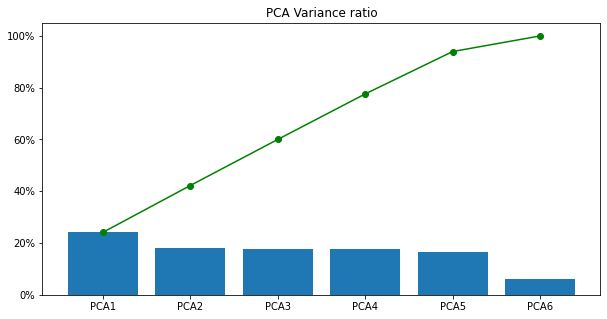

In [21]:
categorical_pca = pca(X_cat, n_components=6)

#### Principal component analysis - Numerical

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

[0.104791   0.1002422  0.0920569  0.09092073 0.08895069 0.08377617
 0.07937965 0.07514333 0.07228079 0.06989109 0.06843824 0.02915943
 0.02543118 0.0195386 ]

Cumulative
[ 10.47910008  20.50331959  29.70900992  38.80108308  47.69615205
  56.0737692   64.01173373  71.52606716  78.75414596  85.74325485
  92.58707928  95.50302246  98.04614009 100.        ]


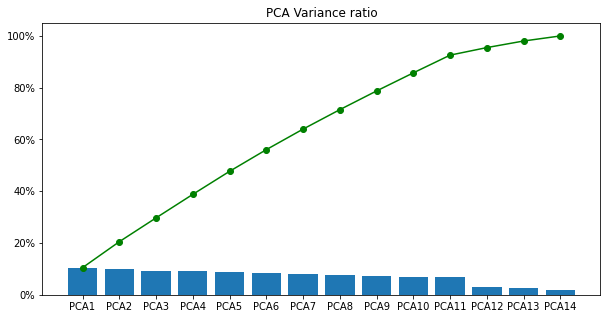

In [23]:
numerical_pca = pca(X_num_scaled, n_components=14)

[6.70439958e-01 1.65179263e-01 1.10061684e-01 5.33450038e-02
 7.14285533e-04 1.87074111e-04 2.66768288e-05 1.70417567e-05
 1.55695508e-05 5.21589180e-06 4.83642461e-06 2.96488147e-06
 3.78739568e-07 4.71552896e-08]

Cumulative
[ 67.04399581  83.56192208  94.56809053  99.90259091  99.97401947
  99.99272688  99.99539456  99.99709874  99.99865569  99.99917728
  99.99966092  99.99995741  99.99999528 100.        ]


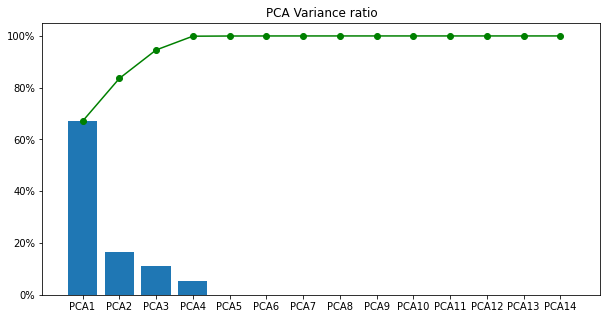

In [24]:
numerical_pca = pca(X_num, n_components=14)

In [25]:
pca = PCA(n_components=4)
X_transf= pca.fit_transform(X_num)
train["num_PCA1"] = X_transf[:, 0]
train["num_PCA2"] = X_transf[:, 1]
train["num_PCA3"] = X_transf[:, 2]
train["num_PCA4"] = X_transf[:, 3]



In [26]:
# feature is now made of the four components of the PCA and the categorical values
features = ["num_PCA1", "num_PCA2", "num_PCA3", "num_PCA4"] + cat_features
X_train = train[features]
X_train

,num_PCA1,num_PCA2,num_PCA3,num_PCA4,bluetooth,dual_sim,4g,3g,touch_screen,wifi
0,430.597105,-795.788278,-390.070331,55.636198,0,0,0,0,0,1
1,504.984729,696.622407,-235.629077,343.925952,1,1,1,1,1,0
2,473.329822,763.942174,-680.059464,-113.916908,1,1,1,1,1,0
3,639.822326,779.691218,-630.783687,-30.402214,1,0,0,1,0,0
4,-718.985171,382.304561,591.040320,-392.357215,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,-1461.096174,843.813177,-456.014435,62.281504,1,1,1,1,1,0
1996,-94.445780,693.937795,708.385242,354.827506,1,1,0,1,1,1
1997,930.669272,436.671467,664.296231,136.527344,0,1,1,1,1,0
1998,-1252.737601,-629.884148,285.786377,-190.422712,0,0,1,1,1,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.30)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [30]:
def knn_class():
    knn_class = KNeighborsClassifier().fit(X_train, y_train)
    knn_prediction = knn_class.predict(X_test)
    print('='*64)
    print('SCORE con KNN: ', accuracy_score(knn_prediction, y_test))

In [31]:
knn_class()

SCORE con KNN:  0.9133333333333333


In [32]:
def models():
    estimators = {
        'LogisticRegression' : LogisticRegression(),
        'SVC' : SVC(),
        'LinearSVC' : LinearSVC(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'KNN' : KNeighborsClassifier(),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0)
    }

    for name, estimator in estimators.items():
        bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(X_train, y_train)
        bag_predict = bag_class.predict(X_test)
        print('='*64)
        print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, y_test)))



In [33]:
models()

SCORE Bagging with LogisticRegression : 0.8816666666666667
SCORE Bagging with SVC : 0.945
SCORE Bagging with LinearSVC : 0.6433333333333333
SCORE Bagging with SGD : 0.5716666666666667
SCORE Bagging with KNN : 0.9133333333333333
SCORE Bagging with DecisionTreeClf : 0.905
SCORE Bagging with RandomTreeForest : 0.9016666666666666


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoosting():
    boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)
    print("="*64)
    print(accuracy_score(boost_pred, y_test))

In [35]:
GradientBoosting()

0.9


In [36]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


kfold = StratifiedKFold(n_splits=5)

In [37]:
kfold = StratifiedKFold(n_splits=5)

In [38]:
def classification_model(model):
    scores = cross_val_score(model, X, y,
    cv=kfold)
    return scores.mean()

In [39]:
# a) Score with XGBoost
classification_model(XGBClassifier())

0.9045

In [40]:
# b) Score with gblinear

classification_model(XGBClassifier(booster='gblinear'))

0.6759999999999999

In [41]:
# c) Score with dart

classification_model(XGBClassifier(booster='dart', one_drop=True))

0.906

#### Applying XGBoost hyperparameter fine-tuning 

In [56]:
def y_pred(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(score)
    return 

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
def grid_search(params, random=False):
  xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
  if random:
    grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1)
  else:
    grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)

  grid.fit(X, y)

  best_params = grid.best_params_
  print("Best params:", best_params)

  best_score = grid.best_score_
  print("Training score:{:.3f}".format(best_score))

##### n_estimators

In [44]:
grid_search(params={'n_estimators':[100, 150, 200, 400, 800]})

Best params: {'n_estimators': 800}
Training score:0.921


In [45]:
grid_search(params={'max_depth':[1, 2, 3, 4, 5, 6, 7,
8], 'n_estimators':[150]})

Best params: {'max_depth': 3, 'n_estimators': 150}
Training score:0.912


In [46]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1,
0.2, 0.3, 0.4, 0.5], 'max_depth':[2], 'n_estimators':
[150]})

Best params: {'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 150}
Training score:0.925


In [47]:
grid_search(params={'min_child_weight':[1, 2, 3, 4,
5], 'max_depth':[2], 'n_estimators':[150]})

Best params: {'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 150}
Training score:0.900


In [48]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8,
0.9, 1], 'max_depth':[2], 'n_estimators':[150]})

Best params: {'max_depth': 2, 'n_estimators': 150, 'subsample': 0.6}
Training score:0.914


In [49]:
grid_search(params={'subsample':[0.9],
'min_child_weight':[3],
'learning_rate':[0.4],
'max_depth':[2],
'n_estimators':[150]})

Best params: {'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.921


In [50]:
grid_search(params={'colsample_bytree':[0.5, 0.6, 0.7,
0.8, 0.9, 1], 'max_depth':[2], 'n_estimators':[150], 'min_child_weight':[3], 'subsample':[0.9], 'learning_rate':[0.4]})

Best params: {'colsample_bytree': 0.6, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.923


In [51]:
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7,
0.8, 0.9, 1], 'max_depth':[2], 'n_estimators':[150], 'min_child_weight':[3], 'subsample':[0.9], 'learning_rate':[0.4]})

Best params: {'colsample_bylevel': 0.8, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.927


In [52]:
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7,
0.8, 0.9, 1], 'max_depth':[2], 'n_estimators':[150], 'min_child_weight':[3], 'subsample':[0.9], 'learning_rate':[0.4]})

Best params: {'colsample_bynode': 0.8, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.927


In [53]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5,
1, 2, 3], 'colsample_bytree':[0.6], 'colsample_level':[0.7], 'colsample_bynode':[0.7], 'max_depth':[2], 'n_estimators':[150], 'min_child_weight':[3], 'subsample':[0.9], 'learning_rate':[0.4]})

Best params: {'colsample_bynode': 0.7, 'colsample_bytree': 0.6, 'colsample_level': 0.7, 'gamma': 1, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.922


#### The best result:

In [54]:
grid_search(params={'gamma':[1], 'colsample_bytree':[0.6], 'colsample_level':[0.7], 'colsample_bynode':[0.7], 'max_depth':[2], 'n_estimators':[150], 'min_child_weight':[3], 'subsample':[0.9], 'learning_rate':[0.4]})

Best params: {'colsample_bynode': 0.7, 'colsample_bytree': 0.6, 'colsample_level': 0.7, 'gamma': 1, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
Training score:0.922


### Tuned XGBClassifier 

In [57]:
y_pred_xgb = y_pred(XGBClassifier(max_depth=2, n_estimators=150, learning_rate=0.4, colsample_bynode= 0.7, colsample_bytree= 0.6, colsample_level= 0.7, min_child_weight= 3, subsample= 0.9 ))

0.9133333333333333
